In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler,PowerTransformer
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture,GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
import lightgbm as lgb
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [76]:
# df=pd.read_csv("../data/TH1.csv")
df =pd.read_csv("../data/GiaSMPvaSMPcap2021.csv",encoding="ISO-8859-1",delimiter=";")
ss=pd.read_csv("../data/TH1.csv")


In [77]:
df=df.drop("Ngay",axis=1)

In [71]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
0,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


In [162]:
feats= ['12']

In [163]:
transformer = PowerTransformer()
X=transformer.fit_transform(df[feats])

In [164]:
X

array([[-1.94289029e-16],
       [ 0.00000000e+00],
       [-1.11022302e-16],
       [-2.77555756e-17],
       [ 1.11022302e-16],
       [ 1.11022302e-16],
       [ 1.11022302e-16],
       [ 1.11022302e-16],
       [ 1.11022302e-16],
       [-1.94289029e-16],
       [-5.55111512e-17],
       [ 1.38777878e-16],
       [ 1.11022302e-16],
       [ 1.11022302e-16],
       [ 1.11022302e-16],
       [ 1.38777878e-16],
       [-1.11022302e-16],
       [ 1.11022302e-16],
       [ 1.38777878e-16],
       [ 1.38777878e-16],
       [ 1.38777878e-16],
       [ 1.11022302e-16],
       [ 0.00000000e+00],
       [-1.11022302e-16],
       [-1.11022302e-16],
       [-1.11022302e-16],
       [-1.94289029e-16],
       [-1.94289029e-16],
       [-3.05311332e-16],
       [-4.71844785e-16],
       [-1.94289029e-16],
       [-1.94289029e-16],
       [-1.94289029e-16],
       [-1.94289029e-16],
       [-1.94289029e-16],
       [-1.94289029e-16],
       [-1.94289029e-16],
       [-1.94289029e-16],
       [-1.9

In [165]:
pca = PCA(n_components=1,random_state=1)
pca.fit(X)
PCA_ds = pd.DataFrame(pca.transform(df[feats]), columns=(["12"]))
PCA_ds.describe()

,12
count,365.000000
mean,-1040.311507
std,105.147065
min,-1565.500000
25%,-1061.500000
50%,-1022.600000
75%,-988.400000
max,-885.700000


Elbow Method to determine the number of clusters to be formed:


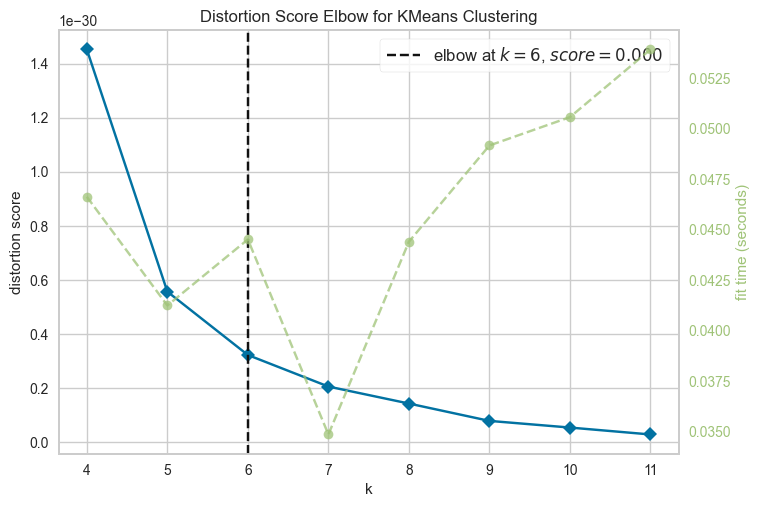

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [166]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=23), k=(4,12))
Elbow_M.fit(X)
Elbow_M.show()

In [170]:
k = 6
# Thực hiện Gaussian Mixture Model
gmm = GaussianMixture(n_components=k) # Số components có thể điều chỉnh
gmm.fit(df.values.reshape(-1, 1))
gmm_labels = gmm.predict(df.values.reshape(-1, 1))

# Thực hiện KMeans clustering
kmeans = KMeans(n_clusters=k, n_init=10) # Số clusters có thể điều chỉnh
kmeans.fit(df.values.reshape(-1, 1))
kmeans_labels = kmeans.predict(df.values.reshape(-1, 1))

# # Thực hiện DBSCAN
# dbscan = DBSCAN(eps=0.5, min_samples=5) # Tham số có thể điều chỉnh
# dbscan_labels = dbscan.fit_predict(df.values.reshape(-1, 1))

# In ra kết quả của mỗi mô hình
print("Gaussian Mixture Model labels:")
print(gmm_labels)
print("\nKMeans labels:")
print(kmeans_labels)
# print("\nDBSCAN labels:")
# print(dbscan_labels)


Gaussian Mixture Model labels:
[4 4 4 ... 4 4 1]

KMeans labels:
[3 3 3 ... 5 5 1]


In [109]:
BGM = BayesianGaussianMixture(n_components=7,covariance_type='full',random_state=1,n_init=15)
# fit model and predict clusters
preds = BGM.fit_predict(X)
PCA_ds["Clusters"] = preds
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= preds

In [110]:
pp=BGM.predict_proba(X)# Calcualting the probabilities of each prediction
df_new=pd.DataFrame(X,columns=feats) 
df_new[[f'predict_proba_{i}' for i in range(7)]]=pp # creating new dataframe columns of probabilites 
df_new['preds']=preds
df_new['predict_proba']=np.max(pp,axis=1)
df_new['predict']=np.argmax(pp,axis=1)
    
train_index=np.array([])
for n in range(7):
    n_inx=df_new[(df_new.preds==n) & (df_new.predict_proba > 0.68)].index
    train_index = np.concatenate((train_index, n_inx))

In [111]:
#ricopue's notebook's code snippet
from sklearn.model_selection import StratifiedKFold
X_new=df_new.loc[train_index][feats]
y=df_new.loc[train_index]['preds']

params_lgb = {'learning_rate': 0.06,'objective': 'multiclass','boosting': 'gbdt','n_jobs': -1,'verbosity': -1, 'num_classes':7} 

model_list=[]

gkf = StratifiedKFold(11)
for fold, (train_idx, valid_idx) in enumerate(gkf.split(X_new,y)):   

    tr_dataset = lgb.Dataset(X_new.iloc[train_idx],y.iloc[train_idx],feature_name = feats)
    vl_dataset = lgb.Dataset(X_new.iloc[valid_idx],y.iloc[valid_idx],feature_name = feats)
    
    model = lgb.train(params = params_lgb, 
                train_set = tr_dataset, 
                valid_sets =  vl_dataset, 
                num_boost_round = 5000, 
                callbacks=[ lgb.early_stopping(stopping_rounds=300, verbose=False), lgb.log_evaluation(period=200)])  
    
    model_list.append(model) 

[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15


In [112]:
lgb_preds=0
for model in model_list:
    lgb_preds+=model.predict(df_new[feats])

In [113]:
labels=np.argmax(lgb_preds,axis=1)


In [94]:
ss.Predicted=np.argmax(lgb_preds,axis=1)

In [115]:
ss.to_csv("submission2.csv",index=False)

# Model LSTM


In [116]:
from keras.preprocessing import sequence 
from keras.models import Sequential 
from keras.layers import Dense, Embedding 
from keras.layers import LSTM 
from keras.datasets import imdb

In [127]:
df2 = pd.read_csv("../data/GiaSMPvaSMPcap2021.csv",encoding="ISO-8859-1",delimiter=";")
df2.head(3)

,Ngay,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4


In [128]:
column_data = df2['12']
print(column_data)


0       964.4
1      1019.7
2       988.4
3      1010.8
4      1061.5
        ...  
360    1002.0
361    1002.0
362    1061.5
363    1022.6
364    1022.6
Name: 12, Length: 365, dtype: float64


In [129]:
import numpy as np

# Function to create sequences
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

# Assuming 'value' is the column you want to predict
time_steps = 10
X, y = create_dataset(column_data , column_data , time_steps)


In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [133]:
if len(X_train.shape) == 2:
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))


In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')


In [136]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1, verbose=1)


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 1037965.6875 - val_loss: 960757.5000
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 803549.2500 - val_loss: 715629.2500
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 537690.8125 - val_loss: 394707.5938
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 290699.7500 - val_loss: 225408.9844
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 139229.4062 - val_loss: 90775.0859
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40620.0938 - val_loss: 35508.0742
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10162.4971 - val_loss: 19675.0020
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8009.8003 - val_loss: 18065.5684
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9273.8867 - val_loss: 18602.1992
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5724.0093 - val_loss: 17443.3984
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7626.7134 - val_loss: 17993.5117
E

In [141]:
if len(X_test.shape) == 2:
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [142]:
mse = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error:', mse)


Mean Squared Error: 11459.4267578125


In [143]:
predictions = model.predict(X_test)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


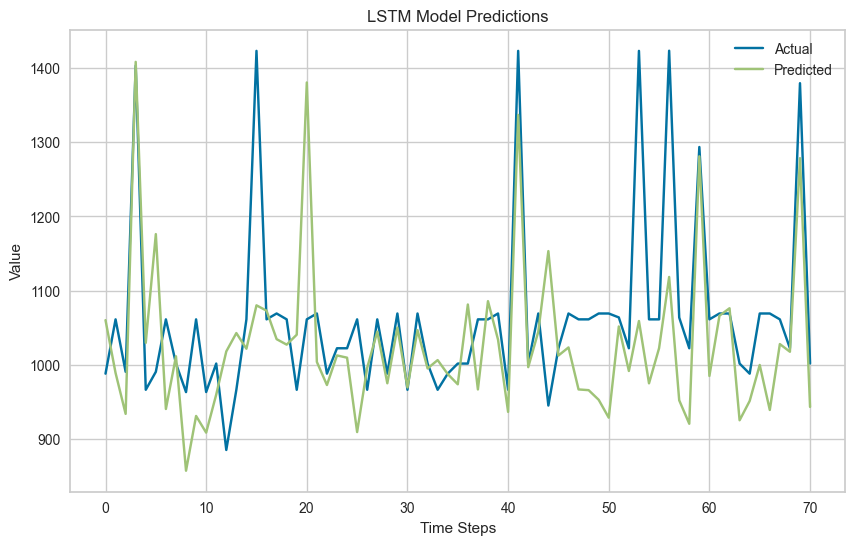

In [144]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('LSTM Model Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()


In [149]:
df2

,Ngay,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,27/12/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,...,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.0,1002.0
361,28/12/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,...,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0
362,29/12/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
363,30/12/2021,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,...,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6


In [151]:
import pandas as pd

# Assuming df2['Ngay'] contains dates in the format "day/month/year"
df2['Ngay'] = pd.to_datetime(df2['Ngay'], format='%d/%m/%Y')


In [152]:
df2['Ngay'] = pd.to_datetime(df2['Ngay'], infer_datetime_format=True, dayfirst=True)


In [158]:
import numpy as np

# Chuyển đổi ngày thành số để tính toán hồi quy
df2['Ngay_ordinal'] = df2['Ngay'].apply(lambda x: x.toordinal())

# Tính hệ số hồi quy tuyến tính
z = np.polyfit(df2['Ngay_ordinal'], df2['12'], 1)
p = np.poly1d(z)

